In [65]:
# %matplotlib notebook
from matplotlib import pyplot as plot
from matplotlib import cm

In [66]:
import numpy
from collections import OrderedDict

In [67]:
fname = './routes.dat'

In [68]:
# Airport ID	Unique OpenFlights identifier for this airport.
# Name	Name of airport. May or may not contain the City name.
# City	Main city served by airport. May be spelled differently from Name.
# Country	Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
# IATA	3-letter IATA code. Null if not assigned/unknown.
# ICAO	4-letter ICAO code.
# Null if not assigned.
# Latitude	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
# Longitude	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
# Altitude	In feet.
# Timezone	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
# DST	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
# Tz database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
# Type	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
# Source	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

In [69]:
aid2city = OrderedDict()

idx = 0
with open('./airports-extended.dat', 'r') as f:
    for line in f:
        ll = line.strip().split(',')
        aid2city[ll[0]] = ll[2]

In [70]:
# Airline	2-letter (IATA) or 3-letter (ICAO) code of the airline.
# Airline ID	Unique OpenFlights identifier for airline (see Airline).
# Source airport	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
# Source airport ID	Unique OpenFlights identifier for source airport (see Airport)
# Destination airport	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
# Destination airport ID	Unique OpenFlights identifier for destination airport (see Airport)
# Codeshare	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
# Stops	Number of stops on this flight ("0" for direct)
# Equipment	3-letter codes for plane type(s) generally used on this flight, separated by spaces

In [71]:
airport2aid = OrderedDict()
airport2idx = OrderedDict()

idx = 0
with open('./routes.dat', 'r') as f:
    for line in f:
        ll = line.strip().split(',')
        airport2aid[ll[2]] = ll[3]
        if ll[2] not in airport2idx:
            airport2idx[ll[2]] = idx
            idx += 1
        airport2aid[ll[4]] = ll[5]
        if ll[4] not in airport2idx:
            airport2idx[ll[4]] = idx
            idx += 1
            
idx2airport = OrderedDict([(vv,kk) for kk, vv in airport2idx.items()])

In [72]:
n_airports = len(airport2idx.keys())

In [73]:
connections = numpy.zeros((n_airports, n_airports))

with open(fname, 'r') as f:
    for line in f:
        ll = line.strip().split(',')
        if ll[7] != '0':
            continue
        sidx = airport2idx[ll[2]]
        tidx = airport2idx[ll[4]]
        connections[sidx, tidx] += 1
        # connections[tidx, sidx] += 1

In [74]:
n_flights = 0

with open(fname, 'r') as f:
    for li, line in enumerate(f):
        n_flights = n_flights + 1

print(n_flights)

67663


In [75]:
weights = connections

In [76]:
weights_mean = numpy.mean(weights,axis=0,keepdims=True)
weights = weights - weights_mean

In [77]:
weights_mean

array([[0.00759124, 0.00817518, 0.00233577, ..., 0.00087591, 0.00058394,
        0.00029197]])

In [78]:
per_airport = connections.sum(1)/2.
sorted_idx = numpy.argsort(per_airport)[::-1]

In [79]:
# take the top-100 most-connected airports
n_top = 100
weights_major = weights[sorted_idx[:n_top],:]
weights_major = weights_major[:,sorted_idx[:n_top]]

In [80]:
fitted, sv, V = numpy.linalg.svd(weights_major, full_matrices=False)

In [81]:
numpy.cumsum((sv**2)) / numpy.sum((sv**2))

array([0.37103912, 0.56072551, 0.66922959, 0.72037584, 0.74884142,
       0.76645814, 0.78303643, 0.79912463, 0.81089788, 0.82239466,
       0.83267123, 0.84270572, 0.85240473, 0.86142855, 0.86897537,
       0.87634147, 0.88336353, 0.89009342, 0.89655164, 0.90227366,
       0.90763023, 0.91290814, 0.9175265 , 0.92196567, 0.92624744,
       0.93034803, 0.93418413, 0.93758354, 0.94085576, 0.94401263,
       0.94699252, 0.9498835 , 0.95265608, 0.95514625, 0.95750898,
       0.95977066, 0.96200288, 0.96422162, 0.96627585, 0.96824629,
       0.97017514, 0.97191238, 0.97358328, 0.97514256, 0.97666783,
       0.97813601, 0.97951473, 0.9808429 , 0.98206019, 0.98325279,
       0.98438014, 0.98547696, 0.98646288, 0.98744097, 0.98838577,
       0.98921228, 0.99000141, 0.99077526, 0.99148097, 0.99216871,
       0.99279512, 0.99337863, 0.99394957, 0.99446284, 0.99496732,
       0.99543227, 0.99587828, 0.99626568, 0.996628  , 0.99696851,
       0.99727837, 0.99757577, 0.997864  , 0.99811734, 0.99834

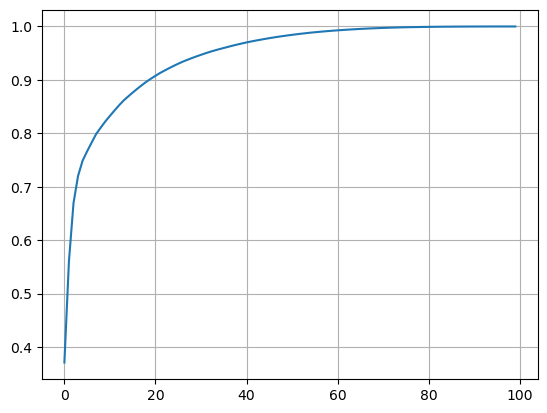

In [82]:
plot.figure()

plot.plot(numpy.cumsum((sv**2)) / numpy.sum((sv**2)))

plot.grid('on')
plot.show()

In [83]:
for vidx in range(10):
    v_sorted_idx = numpy.argsort(V[vidx,:])[::-1][:10]
    print(F'{vidx}:', ','.join(
        [F'{city} ({value:1.2f})' for city, value in
        zip(
            [aid2city.get(airport2aid[idx2airport[sorted_idx[sidx]]],'N/A') for sidx in v_sorted_idx],
            [sv[vidx] * V[vidx,sidx] for sidx in v_sorted_idx])]))

0: "London" (34.90),"Atlanta" (33.53),"New York" (30.90),"Chicago" (29.49),"Los Angeles" (27.55),"Paris" (24.41),"Frankfurt" (21.55),"San Francisco" (21.46),"Toronto" (20.80),"Dallas-Fort Worth" (20.18)
1: "Atlanta" (15.03),"Miami" (7.77),"New York" (7.53),"Chicago" (7.43),"Denver" (7.41),"Dallas-Fort Worth" (6.92),"Philadelphia" (6.67),"Phoenix" (6.49),"Orlando" (6.36),"Boston" (6.34)
2: "Barcelona" (15.97),"Vienna" (13.21),"Copenhagen" (12.81),"Palma de Mallorca" (11.37),"Lisbon" (11.26),"Stockholm" (11.04),"Brussels" (10.91),"Prague" (10.87),"Malaga" (10.36),"Munich" (10.34)
3: "Singapore" (14.34),"Bangkok" (12.74),"Kuala Lumpur" (11.83),"Tokyo" (10.95),"Jakarta" (9.96),"Seoul" (9.04),"Manila" (8.57),"Sydney" (8.18),"Delhi" (7.57),"Hong Kong" (7.36)
4: "New York" (14.60),"Chicago" (11.03),"Miami" (6.95),"Lisbon" (6.00),"Newark" (5.62),"Dallas-Fort Worth" (5.60),"Washington" (5.36),"Prague" (4.55),"Athens" (4.51),"Houston" (3.84)
5: "Chicago" (9.11),"Frankfurt" (5.36),"Cancun" (4.27)

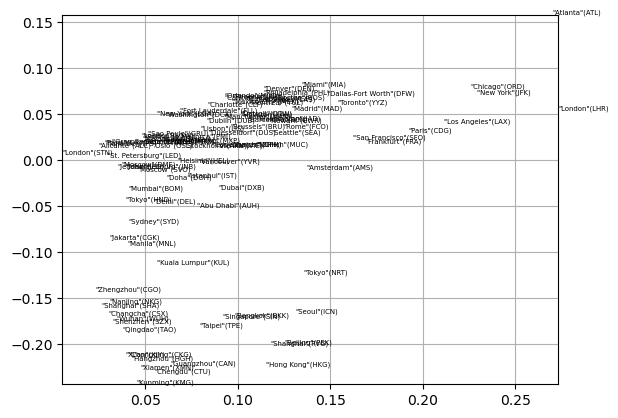

In [84]:
plot.figure()

for ii in range(fitted.shape[0]): #sorted_idx[:100]:
    airport = idx2airport[sorted_idx[ii]]
    aid = airport2aid[airport]
    if aid not in aid2city:
        continue
    city = aid2city[aid]
    plot.annotate('{}({})'.format(city,airport), (fitted[ii,0], fitted[ii,1]), fontsize=5)
    
plot.xlim([fitted.min(0)[0], fitted.max(0)[0]])
plot.ylim([fitted.min(0)[1], fitted.max(0)[1]])
plot.grid('on')

plot.show()